## 36 - Image Inpainting

Image inpainting is the process of removing damage, such as noises, strokes or text, on images. It is particularly useful in the restoration of old photographs which might have scratched edges or ink spots on them. These can be digitally removed through this method. Image inpainting works by replacing the damaged pixels with pixels similar to the neighboring ones, therefore, making them inconspicuous and helping them blend well with the background. Consider the image below.

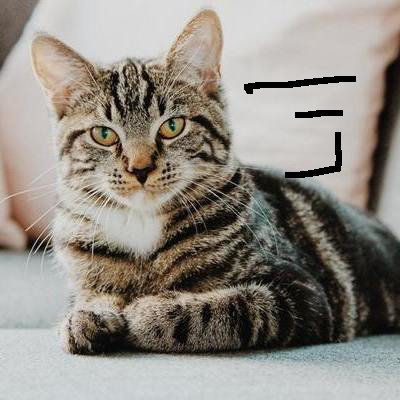

The image has some marks to the right. To inpaint this image, we require a mask, which is essentially a black image with white marks on it to indicate the regions which need to be corrected. In this case, the mask is created manually on GIMP. 

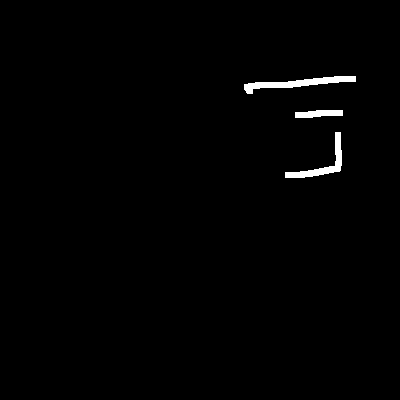

Creating the mask manually in OpenCV

We will follow the following steps to create the mask using OpenCV python:

Reading the damaged image

Getting the shape (height and width) of the image

Converting all the pixels in the damaged image to our desired output i.e., making all the black pixels white and 
other remaining pixels except black into black

We'll save the mask in .jpg format or other format (As per your requirements)

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

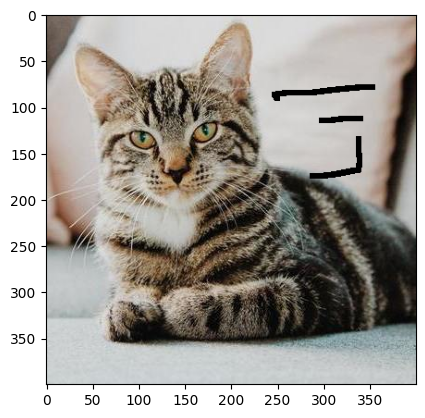

In [3]:
damaged_cat = cv2.imread("/Users/alireza/Coding/OpenCV_Learning/OpenCV_Learnings/Images/cat_damaged.png")
damaged_cat = cv2.cvtColor(damaged_cat,cv2.COLOR_BGR2RGB)
plt.imshow(damaged_cat)

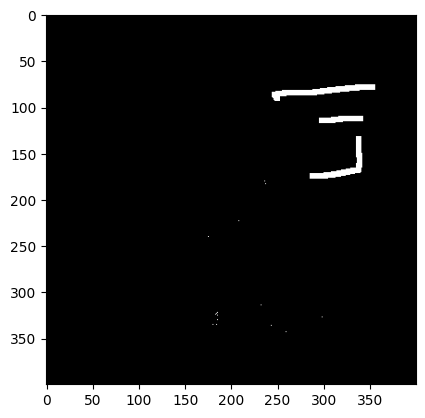

In [6]:
height , width = damaged_cat.shape[0],damaged_cat.shape[1]

# Converting all pixels greater than zero to black while black becomes white
for i in range(height):
    for j in range(width):
        if damaged_cat[i,j].sum() > 0:
            damaged_cat[i,j] = 0
        else:
            damaged_cat[i,j] = [255,255,255]

mask = damaged_cat
cv2.imwrite('mask.jpg', mask)

plt.imshow(mask)

Now if you use the above mask and apply the following inpainting algorithm then you would get same results. 

Inpainting Algorithms - OpenCV implements two inpainting algorithms:

1 - "An Image Inpainting Technique Based on the Fast Marching Method", Alexandru Telea, 2004: This is based on Fast Marching Method (FMM). Looking at the region to be inpainted, the algorithm first starts with the boundary pixels and then goes to the pixels inside the boundary. It replaces each pixel to be inpainted with a weighted sum of the pixels in the background, with more weight given to nearer pixels and boundary pixels.

2 - "Navier-Stokes, Fluid Dynamics, and Image and Video Inpainting", Bertalmio, Marcelo, Andrea L. Bertozzi, and Guillermo Sapiro, 2001: This algorithm is inspired by partial differential equations. Starting from the edges (known regions) towards the unknown regions, it propagates isophote lines (lines that join same-intensity points). Finally, variance in an area is minimized to fill colors.

FMM can be invoked by using cv2.INPAINT_TELEA, while Navier-Stokes can be invoked using cv2.INPAINT_NS. The Python code below inpaints the image of the cat using Navier-Stokes. 

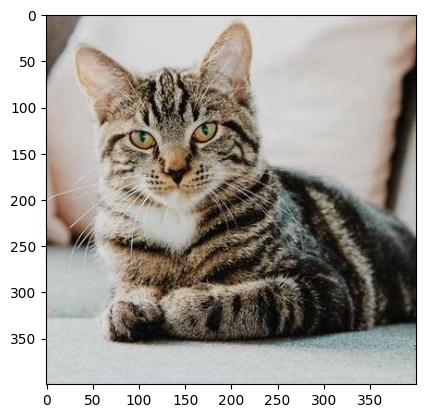

In [9]:
# Open the image.
img = cv2.imread('/Users/alireza/Coding/OpenCV_Learning/OpenCV_Learnings/Images/cat_damaged.png')
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

# Load the mask.
mask = cv2.imread("/Users/alireza/Coding/OpenCV_Learning/OpenCV_Learnings/Images/mask.jpg", 0)

# Inpaint.
inpaint = cv2.inpaint(img, mask, 3, cv2.INPAINT_TELEA)

# Write the output.
plt.imshow(inpaint)

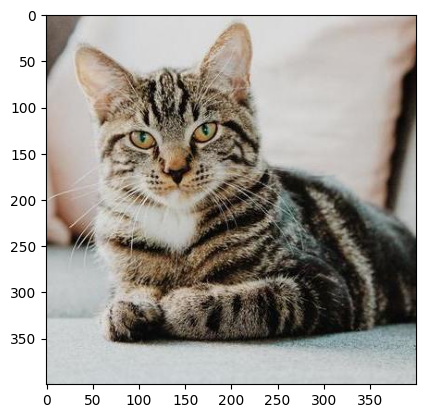

In [10]:
img = cv2.imread('/Users/alireza/Coding/OpenCV_Learning/OpenCV_Learnings/Images/cat_damaged.png')
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

# Load the mask.
mask = cv2.imread("/Users/alireza/Coding/OpenCV_Learning/OpenCV_Learnings/Images/mask.jpg", 0)

# Inpaint.
inpaint = cv2.inpaint(img, mask, 3, cv2.INPAINT_NS)

# Write the output.
plt.imshow(inpaint)